## Prediction using Decision Tree Algorithm

## Author: Minhaj Uddin Meraj
    
## Introduction
A Decision Tree is a type of supervised learning algorithm which uses a tree like structure and is mostly used in classification problems and regression purposes. It is one of the most popular machine learning algorithms.

A decision tree is a structure that includes a root node, branches, and leaf nodes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
df = pd.read_csv("Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


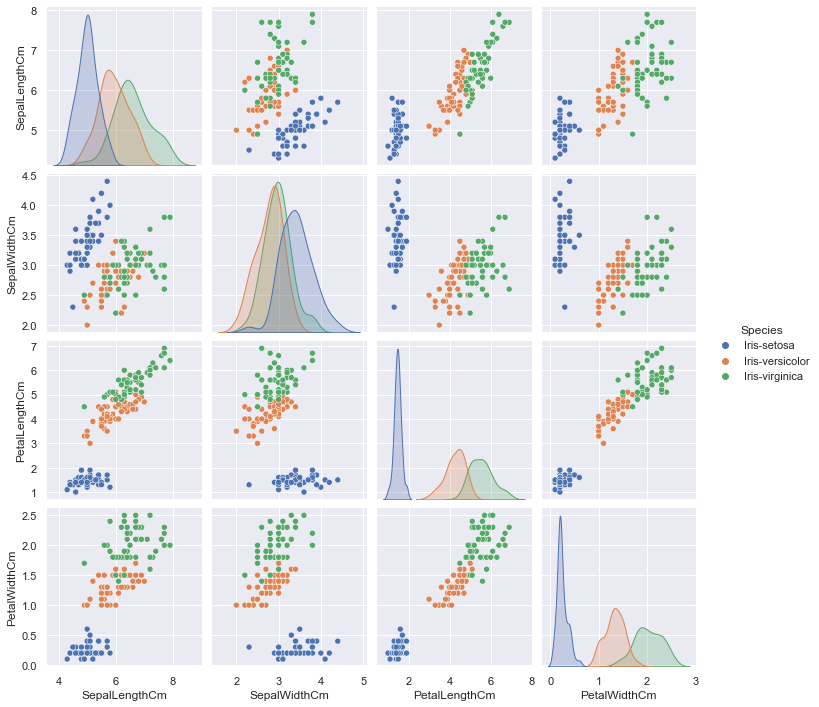

In [9]:
sns.pairplot(data, hue = "Species")

It can be observed that 'Iris-Setosa' make a clear cluster, while the other two overlap eachother

In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

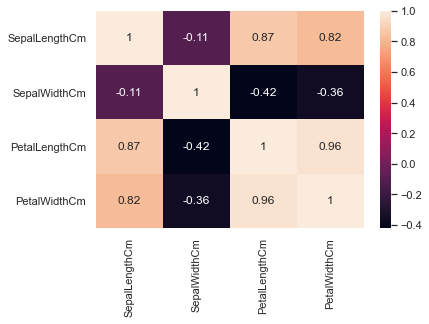

In [13]:
sns.heatmap(data.corr(),fmt=".2g",annot=True)

Observation:
1. Sepal Length is less related to Sepal Width
2. Petal Length is highly related to Petal Width

In [18]:
data.shape

(150, 5)

In [19]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Dataset Preprocessing

In [70]:
X = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,-1]

In [76]:
class_names = y.values

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()
y = le.fit_transform(y)

In [79]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
X.shape

(150, 4)

In [81]:
y.shape

(150,)

## Model Training

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (100, 4)
Test Size:  (50, 4)


## Desicion Tree Algorithm

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ImportError: cannot import name 'accuracy_scoreuracy_score' from 'sklearn.metrics' (d:\python\lib\site-packages\sklearn\metrics\__init__.py)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

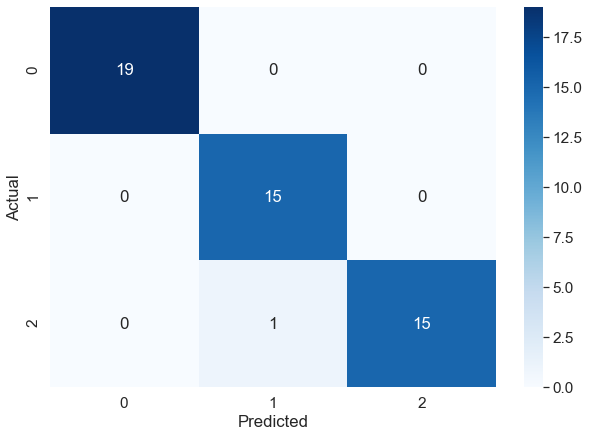

In [94]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name= 'Predicted'
plt.figure(figsize=(10,7))
sns.set(font_scale =1.4)
sns.heatmap(df_cm, cmap = "Blues", annot=True)

In [95]:
print("\nClassification Report",classification_report(y_test,pred))


Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [96]:
print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  0.98


In [97]:
## important features
print(model.feature_importances_)

[0.01256535 0.04005207 0.55087649 0.39650608]


In [98]:
dd=pd.DataFrame({'Actual':y_test,'Predicted':pred})
dd.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


## Visualization of Model

In [99]:
from sklearn.tree import plot_tree

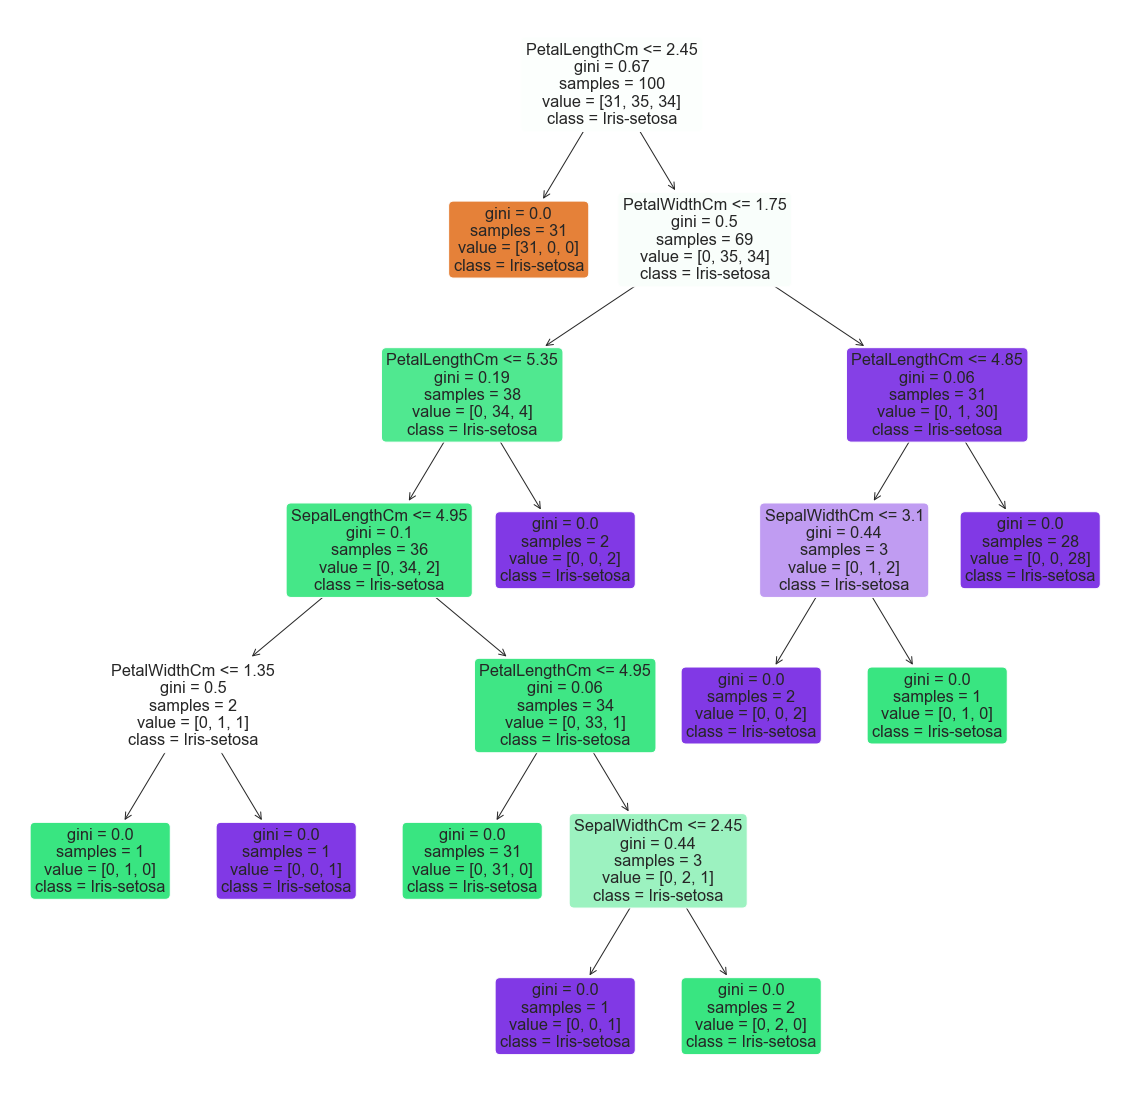

In [101]:
#visualizing the graph
plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=X.columns,precision=2,rounded=True,filled=True,class_names=class_names)